In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [3]:
data = pd.read_csv("Reviews.csv")
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [4]:
print(data.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [5]:
print(data.tail())

                                                Review  Liked
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0


In [6]:
print(data.head(10))

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1


In [7]:
print(data.tail(10))

                                                Review  Liked
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [9]:
print(data.isnull().sum())

Review    0
Liked     0
dtype: int64


In [10]:
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


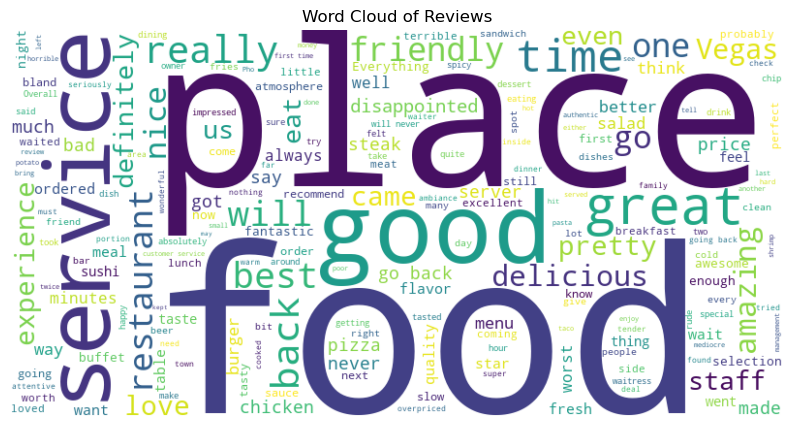

In [11]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [12]:
from collections import Counter

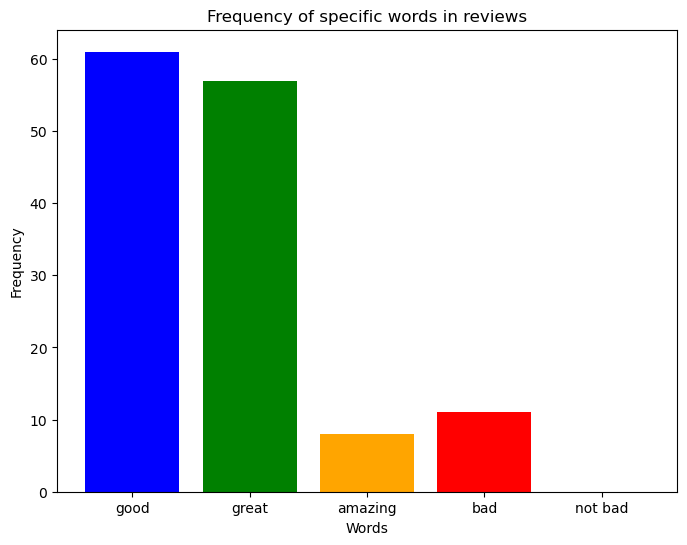

In [13]:
targeted_words = ['good', 'great', 'amazing', 'bad', 'not bad']
all_words = " ".join(data['Review']).lower().split()  
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}
plt.figure(figsize=(8, 6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange', 'red', 'black'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [14]:
lowercases_text = data['Review'].str.lower()
print(lowercases_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


# Tokenization

In [15]:
from nltk.tokenize import word_tokenize
import nltk

In [16]:
nltk.download('punkt')
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data ['Tokens'] )
data.info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6

# Removing Stop Words

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [18]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


# stemming

In [19]:
from nltk.stem import PorterStemmer
Stemmer = PorterStemmer()
data['stemmed'] = data['Review'].apply(lambda x: " ".join([Stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])
data['stemmed'].value_counts()

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

# Lemmatization

In [20]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
lemmatizer = WordNetLemmatizer()
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


# Removing numbers

In [22]:
import re

In [23]:
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+',' ',x))
print(data['No_Numbers'])
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))
print(data['cleaned_text'])
data.info()

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object
0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...          

# Normalization

In [24]:
!pip install contractions
import contractions

Defaulting to user installation because normal site-packages is not writeable


In [25]:
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


# Remove Emoji

In [26]:
!pip install emoji
import emoji

Defaulting to user installation because normal site-packages is not writeable


In [27]:
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


# Removing HTML tags

In [28]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

Defaulting to user installation because normal site-packages is not writeable


In [29]:
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['Cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Cleaned, Length: 1000, dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_16752\1340314868.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [31]:
X = vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [33]:
vectorizer = TfidfVectorizer()

In [34]:
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [35]:
model = MultinomialNB() 
model.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [37]:
print(f'Accuracy {accuracy}')

Accuracy 0.8


In [38]:
print(f'Classfication Report:')
print(report)

Classfication Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [45]:
import string
def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review,"html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]"," ",review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words =set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos = 'v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review

In [47]:
new_review = input("Enter a review: ")
cleaned_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is predicted positive")
else:
    print("The review is predicted negative")

Enter a review: chicken fry is awesome
The review is predicted positive
